In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt


In [2]:
# Load the seaice.csv dataset.
sealevel_df = pd.read_csv("/Users/umabh/DataClass/climate_change_gp/Resources/sealevel.csv")
sealevel_df

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGMSL_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGMSL_GIA,SmoothedGMSL_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [3]:
sealevel_df.dtypes

Year                             int64
TotalWeightedObservations      float64
GMSL_noGIA                     float64
StdDevGMSL_noGIA               float64
SmoothedGMSL_noGIA             float64
GMSL_GIA                       float64
StdDevGMSL_GIA                 float64
SmoothedGMSL_GIA               float64
SmoothedGMSL_GIA_sigremoved    float64
dtype: object

In [4]:
sealevel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1048 non-null   int64  
 1   TotalWeightedObservations    1048 non-null   float64
 2   GMSL_noGIA                   1048 non-null   float64
 3   StdDevGMSL_noGIA             1048 non-null   float64
 4   SmoothedGMSL_noGIA           1048 non-null   float64
 5   GMSL_GIA                     1048 non-null   float64
 6   StdDevGMSL_GIA               1048 non-null   float64
 7   SmoothedGMSL_GIA             1048 non-null   float64
 8   SmoothedGMSL_GIA_sigremoved  1048 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 73.8 KB


In [5]:
sealevel_df.describe()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGMSL_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGMSL_GIA,SmoothedGMSL_GIA_sigremoved
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2006.742366,326568.269981,4.645515,87.007700,4.702004,8.112557,87.062805,8.168273,8.213044
std,8.231978,28044.226934,26.351001,5.525201,26.171990,28.310139,5.557840,28.138879,27.976127
min,1993.000000,906.100000,-44.390000,77.410000,-39.780000,-43.140000,77.420000,-39.770000,-39.110000
25%,2000.000000,327418.897500,-18.250000,83.510000,-17.882500,-16.615000,83.617500,-16.087500,-17.440000
50%,2007.000000,331979.205000,1.930000,85.925000,1.505000,5.465000,85.935000,5.065000,5.170000
75%,2014.000000,335243.865000,25.857500,88.602500,26.115000,30.942500,88.732500,31.095000,29.697500
max,2021.000000,341335.090000,57.920000,118.720000,56.310000,64.390000,118.760000,63.070000,60.560000


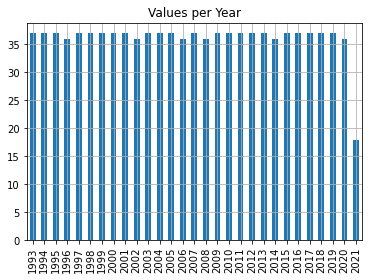

In [6]:
# distribution of years
sealevel_df.Year.value_counts().sort_index().plot(kind='bar')
plt.title('Values per Year')
plt.grid()
plt.show()

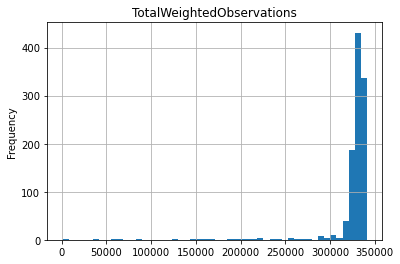

In [7]:
# distribution of total weighted observations
sealevel_df.TotalWeightedObservations.plot(kind='hist', bins=50)
plt.title('TotalWeightedObservations')
plt.grid()
plt.show()

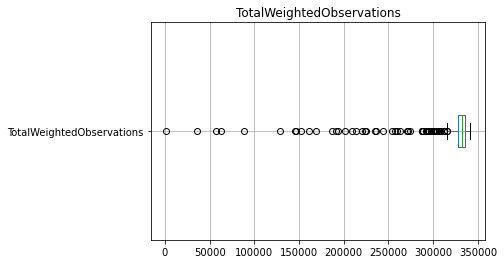

In [8]:
# same using box plot
sealevel_df.TotalWeightedObservations.plot(kind='box', vert=False)
plt.title('TotalWeightedObservations')
plt.grid()
plt.show()

In [9]:
sealevel_df[sealevel_df.TotalWeightedObservations<25000]

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGMSL_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGMSL_GIA,SmoothedGMSL_GIA_sigremoved
107,1995,906.1,-44.39,77.41,-25.34,-43.14,77.42,-24.63,-26.87


In [10]:
perspectives = ['GMSL_noGIA', 'SmoothedGMSL_noGIA', 'GMSL_GIA', 
                'SmoothedGMSL_GIA', 'SmoothedGMSL_GIA_sigremoved']

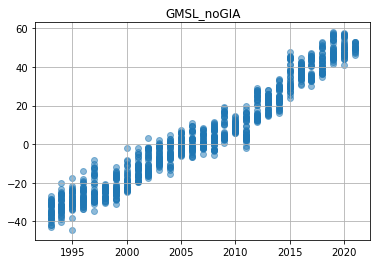

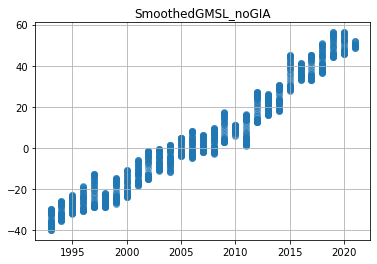

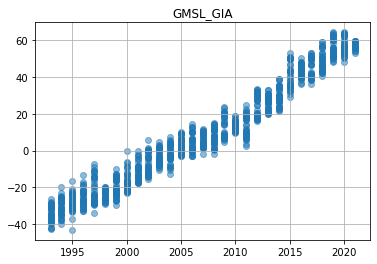

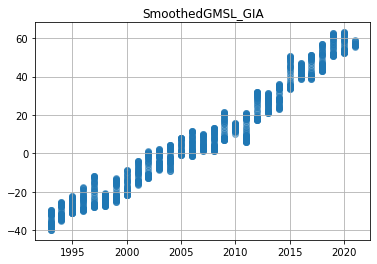

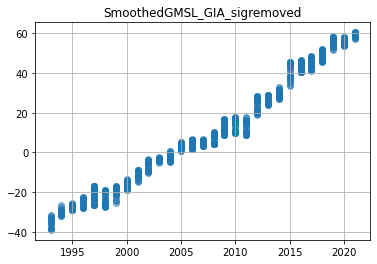

In [11]:
for p in perspectives:
    plt.scatter(sealevel_df.Year, sealevel_df[p], alpha=0.5)
    plt.title(p)
    plt.grid()
    plt.show()

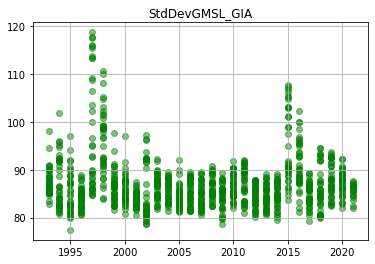

In [12]:
plt.scatter(sealevel_df.Year, sealevel_df.StdDevGMSL_GIA, color='green', alpha=0.5)
plt.title('StdDevGMSL_GIA')
plt.grid()
plt.show()

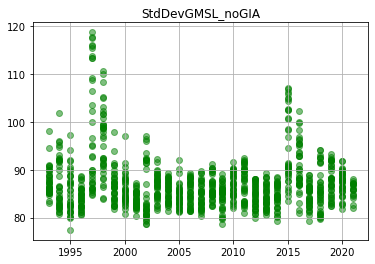

In [15]:
plt.scatter(sealevel_df.Year, sealevel_df.StdDevGMSL_noGIA, color='green', alpha=0.5)
plt.title('StdDevGMSL_noGIA')
plt.grid()
plt.show()

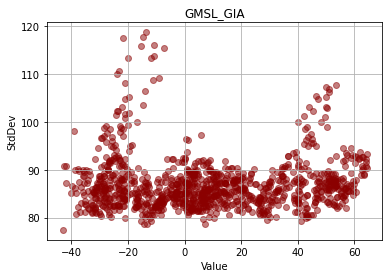

In [18]:
plt.scatter(sealevel_df.GMSL_GIA, sealevel_df.StdDevGMSL_GIA, color='darkred', alpha=0.5)
plt.title('GMSL_GIA')
plt.xlabel('Value')
plt.ylabel('StdDev')
plt.grid()
plt.show()

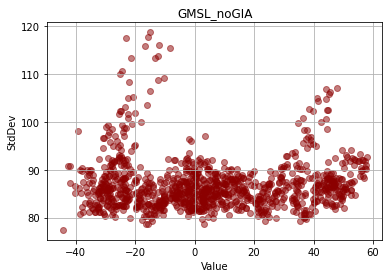

In [19]:
plt.scatter(sealevel_df.GMSL_noGIA, sealevel_df.StdDevGMSL_noGIA, color='darkred', alpha=0.5)
plt.title('GMSL_noGIA')
plt.xlabel('Value')
plt.ylabel('StdDev')
plt.grid()
plt.show()